In [1]:
import pandas as pd
import numpy as np
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/l/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv(zipfile.ZipFile('../data/Train.zip', mode='r').open('Train.csv'), low_memory=False)

In [3]:
inflation = pd.read_csv('../data/Inflation.csv', sep='\t')

In [4]:
inflation.index = inflation.Year

In [16]:
saleyear = np.array(inflation.index[:10])
saleyear

array([1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942])

In [11]:
inflation = inflation.Ave

In [28]:
# np.apply_along_axis(lambda yr: np.cumsum(inflation.loc[yr:])[0], arr=[1941], axis=0)
inflation.iloc[15:18] = 30
inflation.iloc[17]
# cumsum_vec = np.vectorize(np.cumsum)
# cumsum_vec(inflation.loc[saleyear]:])

30.0

In [93]:
avg = inflation.sort_values('Year').Ave
avg[:] = map(lambda i: np.cumsum(avg[i:]).iat[-1], xrange(len(avg)))
avg.loc[avg.index[5:]]

Year
1938    289.0
1939    291.1
1940    292.5
1941    291.8
1942    286.8
1943    275.9
1944    269.8
1945    268.1
1946    265.8
1947    257.5
1948    243.1
1949    235.0
1950    236.2
1951    234.9
1952    227.0
1953    225.1
1954    224.3
1955    223.6
1956    224.0
1957    222.5
1958    219.2
1959    216.4
1960    215.7
1961    214.0
1962    213.0
1963    212.0
1964    210.7
1965    209.4
1966    207.8
1967    204.9
        ...  
1986     80.2
1987     78.3
1988     74.7
1989     70.6
1990     65.8
1991     60.4
1992     56.2
1993     53.2
1994     50.2
1995     47.6
1996     44.8
1997     41.8
1998     39.5
1999     37.9
2000     35.7
2001     32.3
2002     29.5
2003     27.9
2004     25.6
2005     22.9
2006     19.5
2007     16.3
2008     13.5
2009      9.7
2010     10.1
2011      8.5
2012      5.3
2013      3.2
2014      1.7
2015      0.1
Name: Ave, dtype: float64

In [44]:
type(df['SalePrice'])

pandas.core.series.Series

In [12]:
# print df.state.isnull().sum()
# print df.saledate.isnull().sum()
# print df.YearMade.isnull().sum()
# print df.ProductSize.isnull().sum()
# print df.MachineHoursCurrentMeter.isnull().sum()
# print df.UsageBand.isnull().sum()
# print df.fiProductClassDesc.isnull().sum()
# print df.fiProductClassDesc.tail()
# print df.ProductGroupDesc.tail()
# print df.fiBaseModel.tail()
# print df.ModelID.tail()

401120    35
401121    35
401122    35
401123    30
401124    30
Name: fiBaseModel, dtype: object
401120    21439
401121    21439
401122    21439
401123    21435
401124    21435
Name: ModelID, dtype: int64


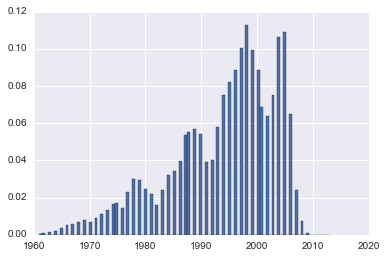

In [6]:
df.YearMade[df.YearMade > 1960].hist(normed=True, bins=100)

In [17]:
float(len(df[(df.YearMade > 1900) & (df.YearMade < 1960)])) / len(df)

0.0009174197569336242

In [23]:
float(len(df[df.YearMade < 1900])) / len(df)

0.09519476472421315

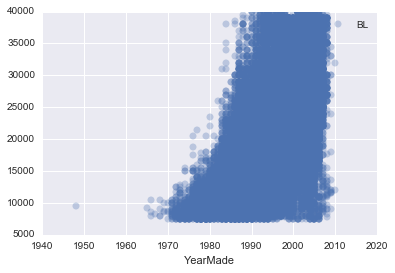

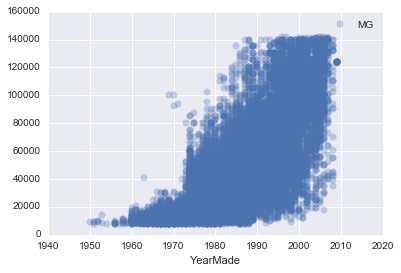

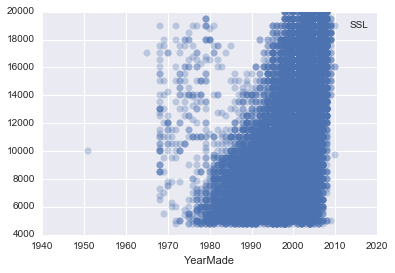

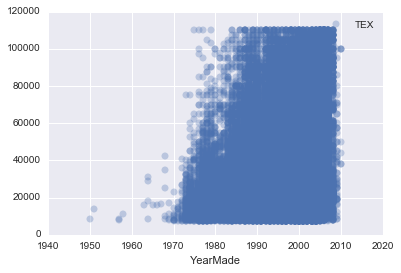

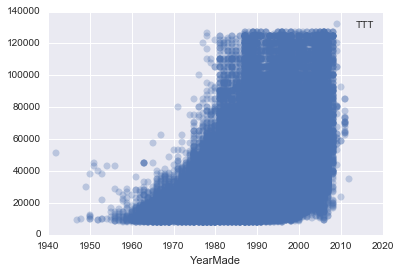

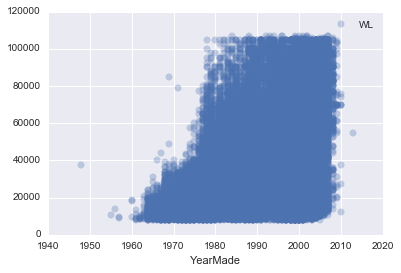

In [55]:
grpdf = df.groupby('ProductGroup')
for key, grp in grpdf:
    grp.plot('YearMade', 'SalePrice', label=key, linewidth=0, marker='o', alpha=0.3)
    plt.xlim([1940, 2020])
#     plt.ylim([4000, 8000])
    plt.legend()
    plt.show()

1.0


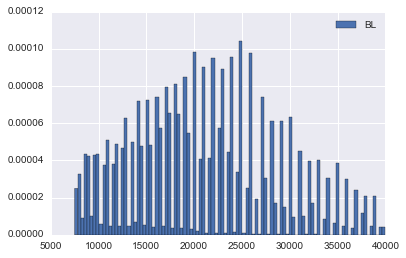

1.0


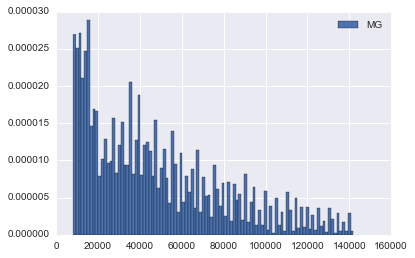

1.0


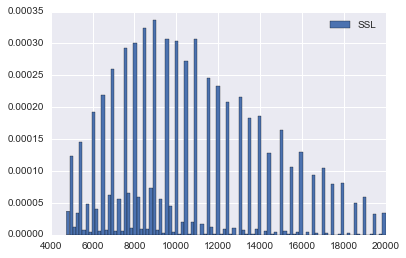

0.00153212015776


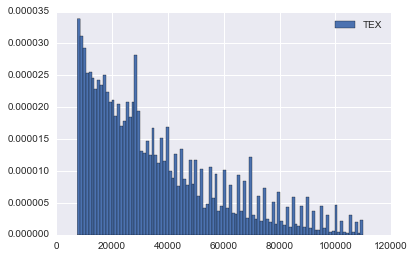

0.489381520119


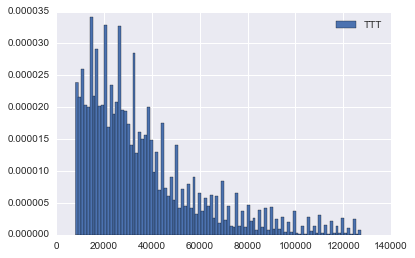

0.321242575233


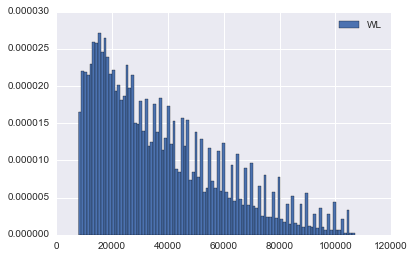

In [54]:
grpdf = df.groupby('ProductGroup')
for key, grp in grpdf:
    grp.SalePrice.hist(normed=True, bins=100, label=key)
    print grp.ProductSize.isnull().sum().astype(float) / len(grp)
    plt.legend()
    plt.show()

In [56]:
df['ProductGroup'].unique()

array(['WL', 'SSL', 'TEX', 'BL', 'TTT', 'MG'], dtype=object)

In [63]:
df_temp = df[:10]
mask = [True,False,True,True,True,False,False,True,False,True]
df_temp.index[mask]
df_temp.drop(df_temp.index[mask])

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
1,1139248,57000,117657,77,121,3,1996,4640,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
5,1139255,26500,1001274,4605,121,3,2004,508,Low,12/18/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000,772701,1937,121,3,1993,11540,High,8/26/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
8,1139272,21500,1036251,36003,121,3,2008,302,Low,8/27/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [12]:
df2 = df.groupby(['state', 'ProductGroupDesc'])['SalePrice'].describe().unstack(level=-1)
df2

count          mean           std    min  \
state         ProductGroupDesc                                                
Alabama       Backhoe Loaders       1796  21107.231626   7919.025334   7500   
              Motor Graders          841  59577.623068  37721.030645   8000   
              Skid Steer Loaders     533  10483.771107   3551.834780   4750   
              Track Excavators      2346  41121.568627  24227.436241   7500   
              Track Type Tractors   2893  36600.466644  23244.587718   8000   
              Wheel Loader          1588  36292.348866  22196.457913   8000   
Alaska        Backhoe Loaders         30  19050.000000   6192.807285   8500   
              Motor Graders           36  46277.777778  32637.717980   8000   
              Skid Steer Loaders      21   9785.714286   3448.084354   6000   
              Track Excavators        89  36876.404494  23850.300277   8000   
              Track Type Tractors    137  31635.036496  23574.233788   8000   
              Wheel Loader           117  36344.017094  21654.311073   8500   
Arizona       Backhoe Loaders       3271  21465.163559   7440.158985   7500   
              Motor Graders          691  61764.833575  34593.530757   8000   
              Skid Steer Loaders     826   9973.244552   3319.888407   4750   
              Track Excavators      1256  38915.007962  25965.085193   7500   
              Track Type Tractors    609  42167.487685  30320.150723   8000   
              Wheel Loader          2520  37243.809524  24496.259069   8000   
Arkansas      Backhoe Loaders        782  19294.728900   7925.011958   7500   
              Motor Graders          321  42200.778816  34347.312591   8000   
              Skid Steer Loaders     249   9787.469880   3653.173778   4750   
              Track Excavators       800  34550.562500  22701.992553   7500   
              Track Type Tractors   1305  31004.449042  20470.246180   8000   
              Wheel Loader           412  28362.014563  18618.194018   8000   
California    Backhoe Loaders       7343  21080.185210   7557.329756   7500   
              Motor Graders         1782  48548.372615  30532.109508   8000   
              Skid Steer Loaders    4002  10176.711644   3512.276450   4750   
              Track Excavators      5329  33711.760931  23050.912413   7500   
              Track Type Tractors   3867  42197.469356  27494.197910   8000   
              Wheel Loader          6696  35773.933692  22533.145054   8000   
...                                  ...           ...           ...    ...   
Virginia      Skid Steer Loaders     282   9900.070922   3164.081331   4750   
              Track Excavators       652  37096.242331  24307.929629   7500   
              Track Type Tractors    522  34878.735632  23478.207070   8000   
              Wheel Loader           271  32709.409594  21830.502234   8000   
Washington    Backhoe Loaders       2792  19350.984957   6822.999699   7500   
              Motor Graders          750  39418.666667  26937.524481   8000   
              Skid Steer Loaders    1163   9699.312124   3293.315147   4750   
              Track Excavators      5651  30556.786409  20764.397318   7500   
              Track Type Tractors   3065  29044.371941  20637.718331   8000   
              Wheel Loader          2534  33639.700079  20932.014915   8000   
Washington DC Backhoe Loaders          1  18500.000000           NaN  18500   
              Track Excavators         1  27000.000000           NaN  27000   
West Virginia Backhoe Loaders         69  20630.434783   8992.093003   7750   
              Motor Graders           31  47629.032258  27465.119619   9500   
              Skid Steer Loaders      44  12289.772727   3678.956177   5500   
              Track Excavators       221  42816.515837  23316.582786   7750   
              Track Type Tractors    254  44945.866142  27013.606816   8250   
              Wheel Loader           127  37465.748031  23711.091522   8500   
Wiscon

In [4]:
null_count = df['MachineHoursCurrentMeter'].isnull().sum()
print null_count, np.round(null_count.astype(float)/len(df),3)

258360 0.644


In [40]:
print 'MachineHoursCurrentMeter null count:'
nulls_df = df.groupby(['ProductGroupDesc'])[['MachineHoursCurrentMeter']].apply(lambda col: col.isnull().sum())
nulls_df.columns = ['Count']
nulls_df['percentage'] = nulls_df['Count'].astype(float) / df.groupby(['ProductGroupDesc'])['SalePrice'].count()
nulls_df

MachineHoursCurrentMeter null count:


,Count,percentage
ProductGroupDesc,,
Backhoe Loaders,53026,0.667708
Motor Graders,16588,0.650791
Skid Steer Loaders,26678,0.613457
Track Excavators,64859,0.641108
Track Type Tractors,51679,0.641816
Wheel Loader,45530,0.640852


In [41]:
print 'UsageBand null count:'
nulls_df = df.groupby(['ProductGroupDesc'])[['UsageBand']].apply(lambda col: col.isnull().sum())
nulls_df.columns = ['Count']
nulls_df['percentage'] = nulls_df['Count'].astype(float) / df.groupby(['ProductGroupDesc'])['SalePrice'].count()
nulls_df

UsageBand null count:


,Count,percentage
ProductGroupDesc,,
Backhoe Loaders,66908,0.842511
Motor Graders,22709,0.890933
Skid Steer Loaders,32726,0.752529
Track Excavators,81275,0.803375
Track Type Tractors,67666,0.840363
Wheel Loader,60202,0.847366


In [45]:
print 'UsageBand null count:'
nulls_df = df.groupby(['ProductGroupDesc'])[['YearMade']].apply(lambda col: col.isnull().sum())
nulls_df.columns = ['Count']
nulls_df['percentage'] = nulls_df['Count'].astype(float) / df.groupby(['ProductGroupDesc'])['SalePrice'].count()
nulls_df

UsageBand null count:


,Count,percentage
ProductGroupDesc,,
Backhoe Loaders,0,0
Motor Graders,0,0
Skid Steer Loaders,0,0
Track Excavators,0,0
Track Type Tractors,0,0
Wheel Loader,0,0


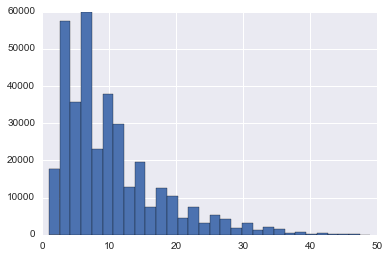

In [53]:
age = df['saledate'].dt.year - df['YearMade']
age = age[age > 0]
age = age[age < 50]
age.hist(bins = 30)

In [63]:
pd.concat([df, pd.get_dummies(df['Forks'])[1:]], axis=1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,Age,None or Unspecified,Yes
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2,NaN,NaN
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,8,1,0
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0,0
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,0
5,1139255,26500,1001274,4605,121,3,2004,508,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0
6,1139256,21000,772701,1937,121,3,1993,11540,High,2004-08-26,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,11,0,0
7,1139261,27000,902002,3539,121,3,2001,4883,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0
8,1139272,21500,1036251,36003,121,3,2008,302,Low,2009-08-27,...,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,1,0,0
9,1139275,65000,1016474,3883,121,3,1000,20700,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1007,1,0


In [ ]:
df['datasource'].unique()

In [ ]:
df.groupby(['datasource']).get_group(172).isnull().sum()

Observations:
* columns to watch: `MachineHoursCurrentMeter`, `UsageBand`
* low NaN: 121, 172
* medium NaN: 136
* high NaN: 132, 149